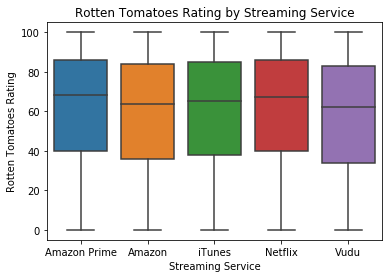

In [60]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import datetime as dt

# Read csv files into pandas dataframes
amazon_prime = pd.read_csv("./scores/amazon_prime.csv", header=None, names=["amazon_prime"])
amazon = pd.read_csv("./scores/amazon.csv", header=None, names=["amazon"])
itunes = pd.read_csv("./scores/itunes.csv", header=None, names=["itunes"])
netflix = pd.read_csv("./scores/netflix_iw.csv", header=None, names=["netflix"])
vudu = pd.read_csv("./scores/vudu.csv", header=None, names=["vudu"])

# Make boxplot of ratings by streaming service
ax = sb.boxplot(data=[amazon_prime, amazon, itunes, netflix, vudu])
ax.set(title="Rotten Tomatoes Rating by Streaming Service", xlabel='Streaming Service', ylabel='Rotten Tomatoes Rating')
ax.set_xticklabels(["Amazon Prime", "Amazon", "iTunes", "Netflix", "Vudu"])
ax

In [35]:
dateparse = lambda x: pd.datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S%z')
all_scores = pd.read_csv("./scores/all_scores.csv")
all_scores['release_date'] = all_scores['release_date'].apply(lambda x: dt.datetime.strptime(x[:-6],'%Y-%m-%d %H:%M:%S'))
all_scores.head()

,title,tomato_score,audience_score,release_date,runtime,rating,genre,cast,studio,director
0,Many Adventures of Winnie the Pooh (1977),100,88,1977-03-10 16:00:00,74,G,"['Animation', 'Comedy', 'Kids & Family', 'Musi...","['Sterling Holloway', 'Paul Winchell', 'Junius...",Walt Disney Productions,"['Wolfgang Reitherman', 'John Lounsbery']"
1,Toy Story 2 (1999),100,86,1999-11-23 16:00:00,92,G,"['Animation', 'Comedy', 'Kids & Family']","['Tim Allen', 'Joan Cusack', 'Kelsey Grammer',...",Buena Vista Pictures,['John Lasseter']
2,The Odd Couple (1968),100,89,1967-12-31 16:00:00,105,PG,"['Classics', 'Comedy', 'Drama']","['Walter Matthau', 'Jack Lemmon', 'Monica Evan...",Paramount Home Video,['Gene Saks']
3,Old Yeller (1957),100,79,1957-12-24 16:00:00,84,G,"['Action & Adventure', 'Classics', 'Drama', 'K...","['Dorothy McGuire', 'Tommy Kirk', 'Kevin Corco...",Buena Vista Pictures,['Robert Stevenson']
4,On a Clear Day You Can See Forever (1970),100,75,1969-12-31 16:00:00,129,G,"['Classics', 'Comedy', 'Drama', 'Musical & Per...","['Barbra Streisand', 'Yves Montand', 'Bob Newh...",Paramount Pictures,['Vincente Minnelli']


In [36]:
# Clean ratings
# ['G' 'PG' 'PG-13 ' 'PG ' 'NR' 'R' 'NR ' 'NC17 ' 'R ' 'PG-13' 'NC17' 'G ' 'PG-13 )' 'R )']
def real_rating(rating):
    if rating in ['G', 'G ']:
        return 'G'
    if rating in ['PG', 'PG ']:
        return 'PG'
    if rating in ['PG-13', 'PG-13 ', 'PG-13 )']:
        return 'PG-13'
    if rating in ['NR', 'NR ']:
        return 'NR'
    if rating in ['NC17 ', 'NC17']:
        return 'NC17'
    return 'R'

all_scores['real_rating'] = all_scores['rating'].apply(real_rating)
all_scores['real_rating'].unique()

array(['G', 'PG', 'PG-13', 'NR', 'R', 'NC17'], dtype=object)

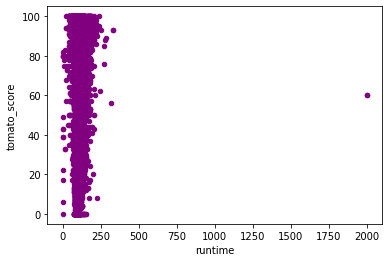

In [37]:
ax_rating = all_scores.plot.scatter(x='runtime', y='tomato_score', c='purple')

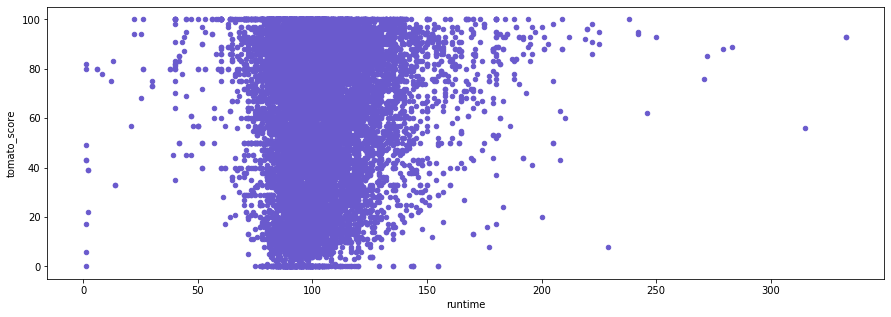

In [38]:
trim_runtime_scores = all_scores[all_scores['runtime'] < 2000]
ax_rating_trim = trim_runtime_scores.plot.scatter(x='runtime', y='tomato_score', c='SlateBlue', figsize=(15, 5))

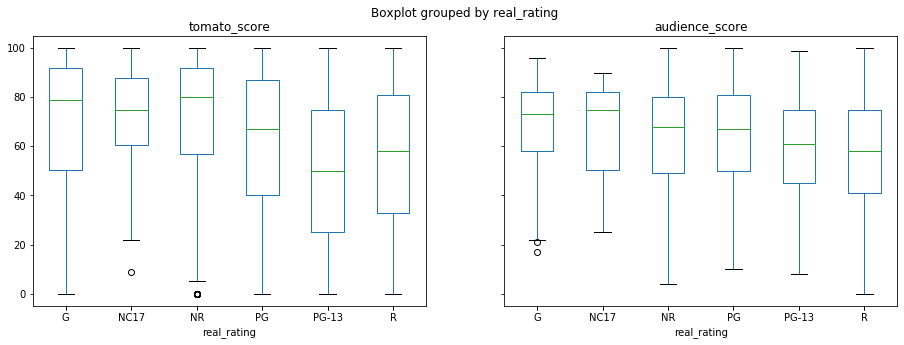

In [39]:
ax_rating_box = all_scores.boxplot(by='real_rating', column=['tomato_score', 'audience_score'], figsize=(15, 5), grid=False)

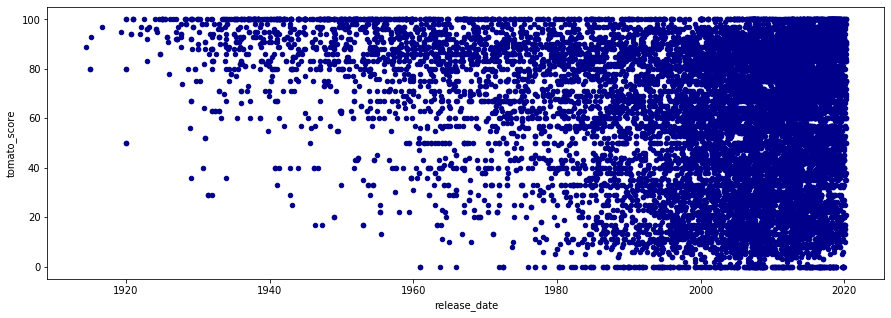

In [40]:
ax_release_scatter = all_scores.plot.scatter(x='release_date', y='tomato_score', c='DarkBlue', figsize=(15, 5))

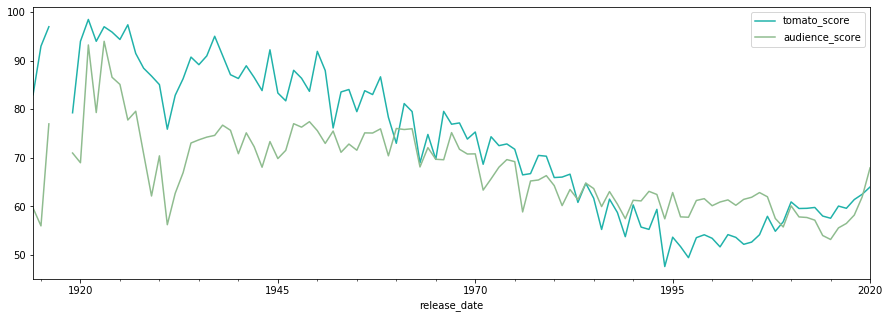

In [80]:
release_scores = all_scores[['tomato_score', 'audience_score']]
release_scores.index = all_scores['release_date']
release_scores.resample('Y').mean().plot(figsize=(15, 5), color=['LightSeaGreen', 'DarkSeaGreen'])

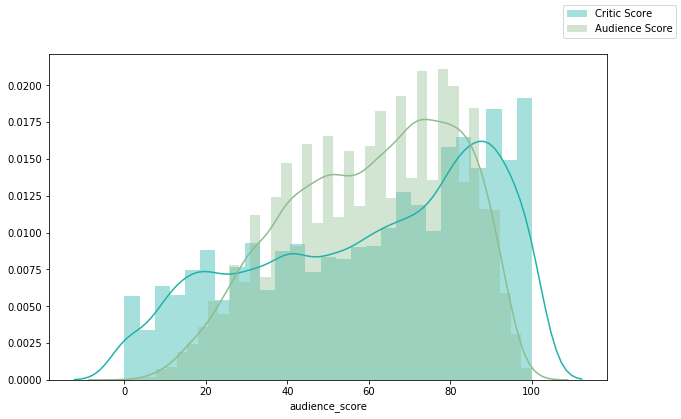

In [82]:
# ax_scores = all_scores.hist(column=['tomato_score', 'audience_score'], bins=20, color='Coral', grid=False, sharey=True, figsize=(15, 5))
fig = plt.figure(figsize=(10,6))
sns.distplot(all_scores['tomato_score'], hist=True, color='LightSeaGreen')
sns.distplot(all_scores['audience_score'], hist=True, color='DarkSeaGreen')
fig.legend(labels=["Critic Score", "Audience Score"])
plt.show()

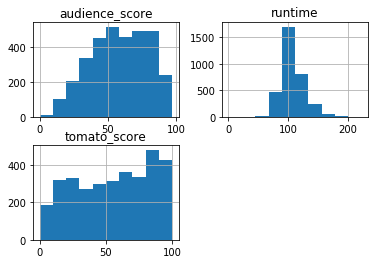

In [57]:
# Dataframes containing movies of given genres
action_df = all_scores[all_scores['genre'].str.contains('Action & Adventure', case=False)]
animation_df = all_scores[all_scores['genre'].str.contains('Animation', case=False)]
art_df = all_scores[all_scores['genre'].str.contains('Art House & International', case=False)]
classics_df = all_scores[all_scores['genre'].str.contains('Classics', case=False)]
comedy_df = all_scores[all_scores['genre'].str.contains('Comedy', case=False)]
doc_df = all_scores[all_scores['genre'].str.contains('Documentary', case=False)]
drama_df = all_scores[all_scores['genre'].str.contains('Drama', case=False)]
horror_df = all_scores[all_scores['genre'].str.contains('Horror', case=False)]
kids_df = all_scores[all_scores['genre'].str.contains('Kids & Family', case=False)]
thrill_df = all_scores[all_scores['genre'].str.contains('Mystery & Suspense', case=False)]
music_df = all_scores[all_scores['genre'].str.contains('Musical & Performing Arts', case=False)]
romance_df = all_scores[all_scores['genre'].str.contains('Romance', case=False)]
scifi_df = all_scores[all_scores['genre'].str.contains('Science Fiction & Fantasy', case=False)]
west_df = all_scores[all_scores['genre'].str.contains('Western', case=False)]

# Genre Histogram comapring critic and audience scores
# genre_ax = drama_df.hist(column=['tomato_score', 'audience_score'], bins=20, color='LightSeaGreen', grid=False, sharey=True, figsize=(15, 5))

# fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14)= plt.subplots(14, 1)
# fig = plt.figure()
#ax1 = action_df.hist(column=['tomato_score', 'audience_score'], bins=20, color='LightSeaGreen', grid=False, sharey=True, figsize=(15, 5))
#ax2 = animation_df.hist(column=['tomato_score', 'audience_score'], bins=20, color='LightSeaGreen', grid=False, sharey=True, figsize=(15, 5))
#ax3 = art_df.hist(column=['tomato_score', 'audience_score'], bins=20, color='LightSeaGreen', grid=False, sharey=True, figsize=(15, 5))
#ax4 = classics_df.hist(column=['tomato_score', 'audience_score'], bins=20, color='LightSeaGreen', grid=False, sharey=True, figsize=(15, 5))
#ax5 = comedy_df.hist(column=['tomato_score', 'audience_score'], bins=20, color='LightSeaGreen', grid=False, sharey=True, figsize=(15, 5))
#ax6 = doc_df.hist(column=['tomato_score', 'audience_score'], bins=20, color='LightSeaGreen', grid=False, sharey=True, figsize=(15, 5))
#ax7 = drama_df.hist(column=['tomato_score', 'audience_score'], bins=20, color='LightSeaGreen', grid=False, sharey=True, figsize=(15, 5))
#ax8 = horror_df.hist(column=['tomato_score', 'audience_score'], bins=20, color='LightSeaGreen', grid=False, sharey=True, figsize=(15, 5))
#ax9 = kids_df.hist(column=['tomato_score', 'audience_score'], bins=20, color='LightSeaGreen', grid=False, sharey=True, figsize=(15, 5))
#ax10 = thrill_df.hist(column=['tomato_score', 'audience_score'], bins=20, color='LightSeaGreen', grid=False, sharey=True, figsize=(15, 5))
#ax11 = music_df.hist(column=['tomato_score', 'audience_score'], bins=20, color='LightSeaGreen', grid=False, sharey=True, figsize=(15, 5))
#ax12 = romance_df.hist(column=['tomato_score', 'audience_score'], bins=20, color='LightSeaGreen', grid=False, sharey=True, figsize=(15, 5))
#ax13 = scifi_df.hist(column=['tomato_score', 'audience_score'], bins=20, color='LightSeaGreen', grid=False, sharey=True, figsize=(15, 5))
#ax14 = west_df.hist(column=['tomato_score', 'audience_score'], bins=20, color='LightSeaGreen', grid=False, sharey=True, figsize=(15, 5))

plt.show()

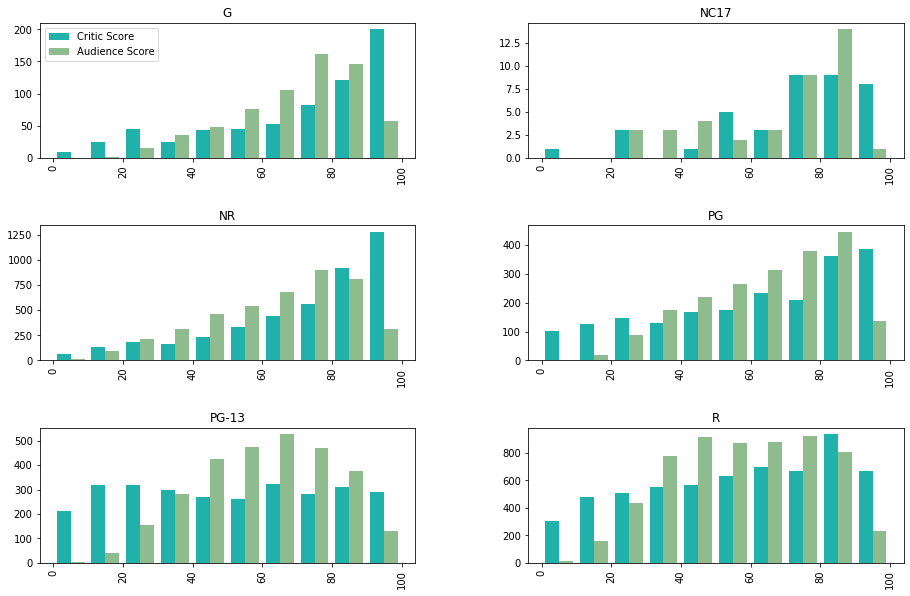

In [83]:
rating_scores = all_scores.copy()
rating_scores = rating_scores.drop(['release_date', 'runtime'], axis=1)
rating_ax = rating_scores.hist(by=rating_scores['real_rating'], color=['LightSeaGreen', 'DarkSeaGreen'], figsize=(15,10), label=['Critic Score', 'Audience Score'], range=(0,100))

# Add legend
rating_ax[0][0].legend()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f120ec0b588>]],
      dtype=object)

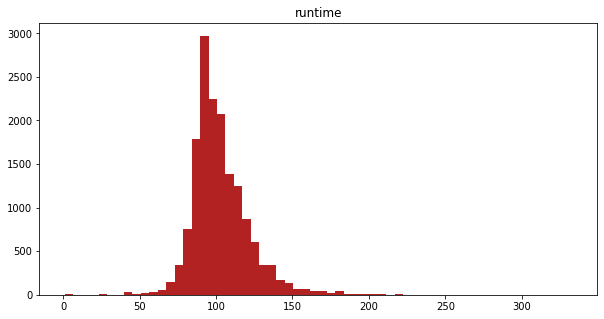

In [45]:
trim_runtime_scores.hist(column='runtime', bins=60, grid=False, color='FireBrick', figsize=(10, 5))